In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import requests
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from pprint import pprint

sys.path.append("../")

load_dotenv() 

True

In [8]:
FRED_API_KEY = os.getenv("FRED_API_KEY")

In [9]:
# FRED
url = f'https://api.stlouisfed.org/fred/series/observations?series_id=SP500&api_key={FRED_API_KEY}&file_type=json'


r = requests.get(url)
data = r.json()

pprint(data.keys())

dict_keys(['realtime_start', 'realtime_end', 'observation_start', 'observation_end', 'units', 'output_type', 'file_type', 'order_by', 'sort_order', 'count', 'offset', 'limit', 'observations'])


In [10]:
df_sp500 = pd.DataFrame(data['observations'])
df_sp500["date"] = pd.to_datetime(df_sp500["date"])

In [11]:
df_sp500 = df_sp500.drop(["realtime_start", "realtime_end"], axis=1).set_index("date").rename(columns={"value":"close"})
df_sp500["close"] = df_sp500["close"].apply(pd.to_numeric, errors='coerce')

In [12]:
df_sp500["close_lag_1"] = df_sp500["close"].shift(periods=1)

In [13]:
df_sp500["daily_return"] = (df_sp500["close"] / df_sp500["close_lag_1"]) - 1

In [14]:
df_sp500

,close,close_lag_1,daily_return
date,,,
2014-05-05,1884.66,NaN,NaN
2014-05-06,1867.72,1884.66,-0.008988
2014-05-07,1878.21,1867.72,0.005616
2014-05-08,1875.63,1878.21,-0.001374
2014-05-09,1878.48,1875.63,0.001519
...,...,...,...
2024-04-29,5116.17,5099.96,0.003178
2024-04-30,5035.69,5116.17,-0.015731
2024-05-01,5018.39,5035.69,-0.003435


Text(0.5, 1.0, 'SP500 Closing Prices')

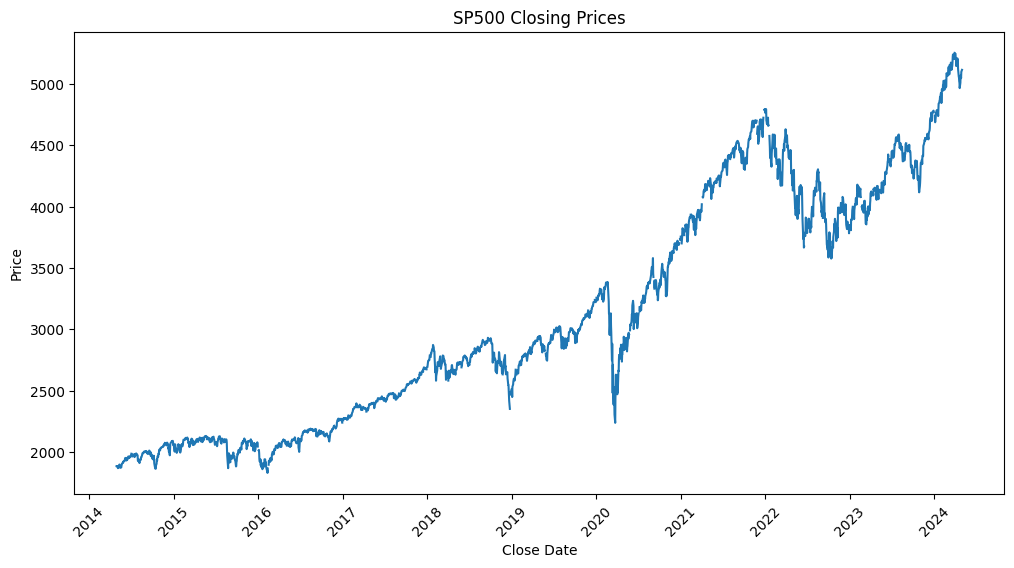

In [52]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
ax.plot(df_sp500.index, df_sp500["close"])

# Set the x-axis label and rotate the tick labels
ax.set_xlabel('Close Date')
plt.xticks(rotation=45)

# Set the y-axis label
ax.set_ylabel('Price')

# Set the plot title
plt.title('SP500 Closing Prices')

Text(0.5, 1.0, 'SP500 Daily Returns (%)')

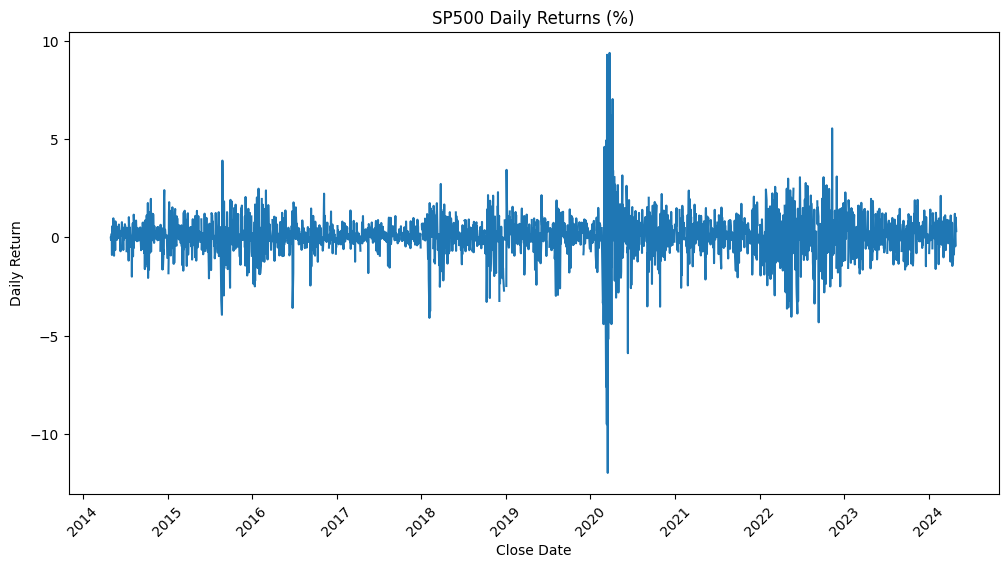

In [66]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
ax.plot(df_sp500.index, df_sp500["daily_return"] * 100)

# Set the x-axis label and rotate the tick labels
ax.set_xlabel('Close Date')
plt.xticks(rotation=45)

# Set the y-axis label
ax.set_ylabel('Daily Return')

# Set the plot title
plt.title('SP500 Daily Returns (%)')

In [10]:
from stocks_feed.dataloader import Stock, Index

In [7]:
s = Stock("WMT", "2023-01-01", "2023-12-31")

In [8]:
s.df

,v,vw,o,c,h,l,t,n,ticker,close_lag_1,daily_return
2023-01-03,17249685.0,47.6923,47.5167,47.8667,47.9033,47.3633,1672722000000,93339,WMT,NaN,NaN
2023-01-04,13338909.0,47.7766,47.8067,47.9200,48.0167,47.3567,1672808400000,70023,WMT,47.8667,0.001114
2023-01-05,13274421.0,47.7787,47.8200,47.7567,48.0433,47.5500,1672894800000,64290,WMT,47.9200,-0.003408
2023-01-06,21231807.0,48.8670,48.2000,48.9267,49.1833,48.0800,1672981200000,91719,WMT,47.7567,0.024499
2023-01-09,17756619.0,48.6350,48.7733,48.3167,49.2867,48.2667,1673240400000,86644,WMT,48.9267,-0.012468
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,19405641.0,52.2338,51.8167,52.2167,52.3833,51.7184,1703221200000,91668,WMT,51.6000,0.011952
2023-12-26,11679963.0,52.1495,52.2167,52.1367,52.3300,52.0367,1703566800000,66850,WMT,52.2167,-0.001532
2023-12-27,19895964.0,52.5353,52.1033,52.6267,52.6483,52.0533,1703653200000,86009,WMT,52.1367,0.009398
2023-12-28,16776066.0,52.5901,52.5900,52.5233,52.7767,52.5000,1703739600000,81975,WMT,52.6267,-0.001965


In [9]:
df_test = df_sp500.join(s.df, how="inner", lsuffix="_SP500", rsuffix="_WMT")

NameError: name 'df_sp500' is not defined

In [37]:
df_test

,close,close_lag_1_SP500,daily_return_SP500,v,vw,o,c,h,l,t,n,ticker,close_lag_1_WMT,daily_return_WMT
2022-05-04,4300.17,4175.48,0.029862,20022669.0,51.1370,50.6767,51.5400,51.6067,50.5033,1651636800000,84748,WMT,NaN,NaN
2022-05-05,4146.87,4300.17,-0.035650,23234319.0,50.8110,51.2133,50.9133,51.2767,50.4667,1651723200000,98247,WMT,51.5400,-0.012159
2022-05-06,4123.34,4146.87,-0.005674,34258074.0,50.1658,50.5700,49.8533,51.3167,49.4233,1651809600000,141497,WMT,50.9133,-0.020820
2022-05-09,3991.24,4123.34,-0.032037,28207077.0,50.4719,49.4900,50.4367,51.0333,49.3967,1652068800000,125828,WMT,49.8533,0.011702
2022-05-10,4001.05,3991.24,0.002458,24861318.0,49.8676,50.4767,49.7267,50.7633,49.5200,1652155200000,108217,WMT,50.4367,-0.014077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,4754.63,4746.75,0.001660,19405641.0,52.2338,51.8167,52.2167,52.3833,51.7184,1703221200000,91668,WMT,51.6000,0.011952
2023-12-26,4774.75,NaN,NaN,11679963.0,52.1495,52.2167,52.1367,52.3300,52.0367,1703566800000,66850,WMT,52.2167,-0.001532
2023-12-27,4781.58,4774.75,0.001430,19895964.0,52.5353,52.1033,52.6267,52.6483,52.0533,1703653200000,86009,WMT,52.1367,0.009398
2023-12-28,4783.35,4781.58,0.000370,16776066.0,52.5901,52.5900,52.5233,52.7767,52.5000,1703739600000,81975,WMT,52.6267,-0.001965


In [38]:
import seaborn as sns

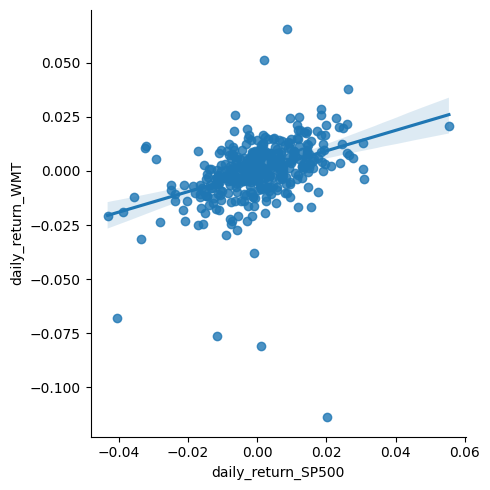

In [39]:
sns.lmplot(df_test, x="daily_return_SP500", y="daily_return_WMT")

In [13]:
idx = Index()

In [14]:
idx.df

,close,close_lag_1,daily_return
date,,,
2014-05-05,1884.66,NaN,NaN
2014-05-06,1867.72,1884.66,-0.008988
2014-05-07,1878.21,1867.72,0.005616
2014-05-08,1875.63,1878.21,-0.001374
2014-05-09,1878.48,1875.63,0.001519
...,...,...,...
2024-04-29,5116.17,5099.96,0.003178
2024-04-30,5035.69,5116.17,-0.015731
2024-05-01,5018.39,5035.69,-0.003435
